# Airline Satisfaction Analysis

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [10, 6]

## Data Import and Overview

In [3]:
df = pd.read_csv('./data/airline_passenger_satisfaction.csv')

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.describe(include='O')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [8]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

## Data Cleaning

First, we should get rid of the column "Unnamed: 0", as we do not need it. 

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


We also have a column, 'Arrival Delay in Minutes'. Let's take a look at the distribution to determine if we should impute the value, or not. 

In [11]:
df.columns = df.columns.str.replace(r'[ /-]', '_', regex=True).str.lower()

Text(0.5, 0, 'Arrival Delay in Minutes')

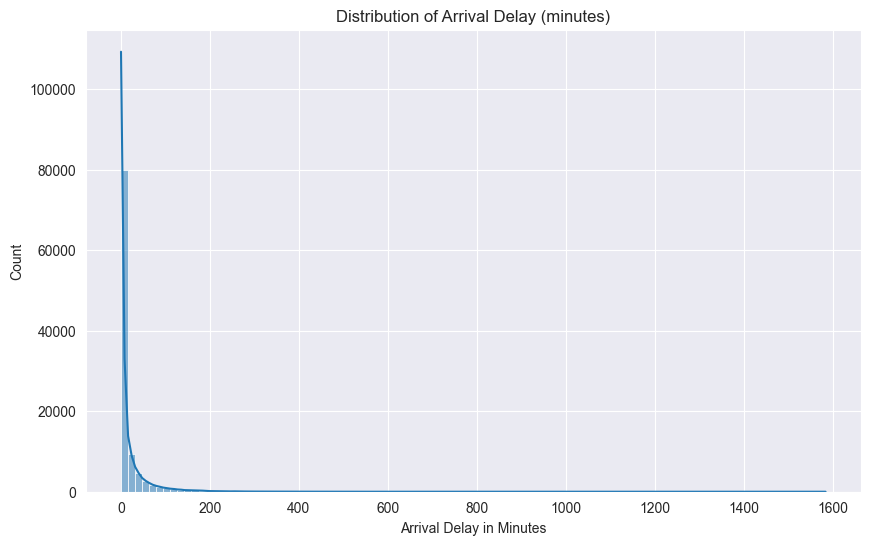

In [12]:
ax = sns.histplot(data=df, x='arrival_delay_in_minutes', bins=100, kde=True)
plt.title("Distribution of Arrival Delay (minutes)")
plt.xlabel("Arrival Delay in Minutes")

> Looking at the histogram and its KDE plot, if it hard to tell what is going on. We can see that the majority of the values are on the left side, but > it is extremely zoomed out, due to the extreme values on the right side (that we cannot see).
>
> We also see the majority of the dataset is 0, meaning most flights do not have a delay. 
>
> Let's use a boxplot to better see the distriubtion

Text(0.5, 0, 'Arrival Delay in Minutes')

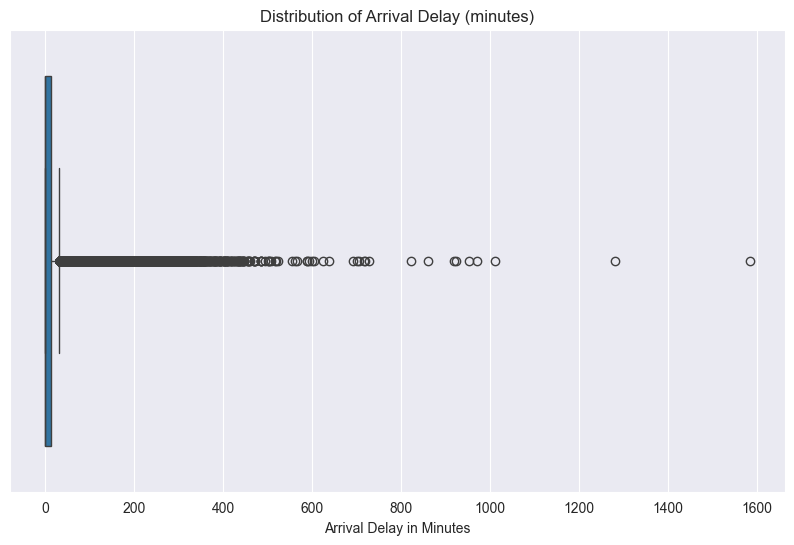

In [13]:
sns.boxplot(data=df, x="arrival_delay_in_minutes")
plt.title("Distribution of Arrival Delay (minutes)")
plt.xlabel("Arrival Delay in Minutes")

> Even with the boxplot it can still be a little hard to read, but we see that most of the values are under 15 minutes, which is not considered to be a delay according to the [OAG](https://www.oag.com/airline-on-time-performance-defining-late#ontime)

In [14]:
df['arrival_delay_in_minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: arrival_delay_in_minutes, dtype: float64

Due to the left skewness of the graph, and that there is no evidence that any of these outliers are false data, we will impute the missing values with the median value (which is 0, assuming no delay). We will also add a column that indicates that the value was imputed, so that our model will be able to know what data was imputed. 

In [15]:
df['arrival_delayed_missing'] = df['arrival_delay_in_minutes'].isna().astype(int)
# creates a new column toindicate if the arrival delay was missing or not

In [16]:
df['arrival_delayed_missing'].value_counts()

arrival_delayed_missing
0    103594
1       310
Name: count, dtype: int64

In [17]:
df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median())

In [18]:
df.isna().sum()

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on_board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
arrival_delayed_missing              0
dtype: int64

We now have no missing values in the data set. To continue cleaning though, lets rename the columns for better usability. 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   gender                             103904 non-null  object 
 2   customer_type                      103904 non-null  object 
 3   age                                103904 non-null  int64  
 4   type_of_travel                     103904 non-null  object 
 5   class                              103904 non-null  object 
 6   flight_distance                    103904 non-null  int64  
 7   inflight_wifi_service              103904 non-null  int64  
 8   departure_arrival_time_convenient  103904 non-null  int64  
 9   ease_of_online_booking             103904 non-null  int64  
 10  gate_location                      103904 non-null  int64  
 11  food_and_drink                     1039

## Feature Engineering and Categorical Typing

Let's create some columns that may help in our analysis. 

### Age Groups

In [20]:
bins = [df['age'].min()-1, 13, 20, 25, 65, df['age'].max()+1]
labels = ['child', 'teenager', 'young adult', 'adult', 'senior']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [21]:
df['age_group'].value_counts(normalize=True)

age_group
adult          0.763599
young adult    0.096262
teenager       0.057005
senior         0.045696
child          0.037438
Name: proportion, dtype: float64

### Delay Groups

In [22]:
bins = [
    -float("inf"),  # early or on time
    1,
    16,
    46,
    121,
    float("inf")
]

labels = [
    "on time",
    "small delay", 
    "medium delay",
    "large delay", 
    "very large delay"
]

df['departure_delay_group'] = pd.cut(df['departure_delay_in_minutes'], bins=bins, labels=labels)
df['arrival_delay_group'] = pd.cut(df['arrival_delay_in_minutes'], bins=bins, labels=labels)

In [23]:
df['departure_delay_group'].value_counts(normalize=True)

departure_delay_group
on time             0.593009
small delay         0.192687
medium delay        0.120582
large delay         0.069545
very large delay    0.024176
Name: proportion, dtype: float64

In [24]:
df['arrival_delay_group'].value_counts(normalize=True)

arrival_delay_group
on time             0.584001
small delay         0.196576
medium delay        0.124759
large delay         0.069882
very large delay    0.024782
Name: proportion, dtype: float64

### Categorical Columns

In [25]:
delay_order =  ["on time", "small delay", "medium delay","large delay", "very large delay"]
age_order = ['child', 'teenager', 'young adult', 'adult', 'senior']
class_order = ["Business", 'Eco', 'Eco Plus']

df['arrival_delay_group'] = pd.Categorical(df['arrival_delay_group'], categories=delay_order, ordered=True)
df['departure_delay_group'] = pd.Categorical(df['departure_delay_group'], categories=delay_order, ordered=True)
df['age_group'] = pd.Categorical(df['age_group'], categories=age_order, ordered=True)
df['class'] = pd.Categorical(df['class'], categories=class_order, ordered=True)
df['type_of_travel'] = df['type_of_travel'].astype('category')
df['customer_type'] = df['customer_type'].astype('category')

In [26]:
df['satisfaction'] = pd.Categorical(df['satisfaction'], categories=['neutral or dissatisfied', 'satisfied'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 103904 non-null  int64   
 1   gender                             103904 non-null  object  
 2   customer_type                      103904 non-null  category
 3   age                                103904 non-null  int64   
 4   type_of_travel                     103904 non-null  category
 5   class                              103904 non-null  category
 6   flight_distance                    103904 non-null  int64   
 7   inflight_wifi_service              103904 non-null  int64   
 8   departure_arrival_time_convenient  103904 non-null  int64   
 9   ease_of_online_booking             103904 non-null  int64   
 10  gate_location                      103904 non-null  int64   
 11  food_and_drink            

## Exploratory Data Analysis

### Questions

1. How does the inflight wifi relate to the satisfaction?
3. Does departure delay have an affect on satisfaction?
4. How does airline satisfaction differ by gender?
5. How does the satisfaction rating differ by age group?
4. Does seat_comfort affect satisfaction?
6. Does cleanliness affect satisfaction?
6. Is there a relationship between inflight wifi and flight distance? 

### How does the inflight wifi relate to the satisfaction?

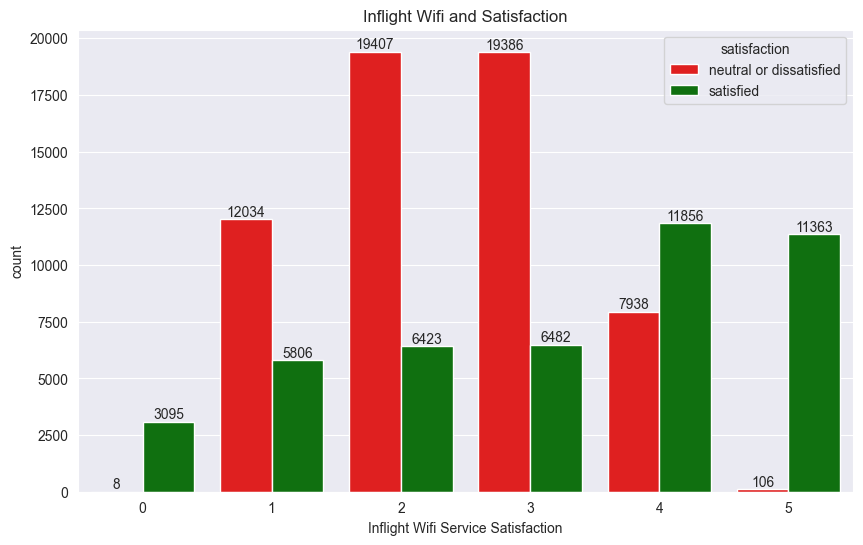

In [28]:
ax = sns.countplot(data=df, x='inflight_wifi_service', hue='satisfaction', palette=['red', 'green'])
for container in ax.containers:
    ax.bar_label(container)

plt.title("Inflight Wifi and Satisfaction")
plt.xlabel("Inflight Wifi Service Satisfaction")
plt.savefig('./images/wifi_sat.png')

In [29]:
wifi_sat = df.groupby('inflight_wifi_service', observed=True)['satisfaction'].value_counts(normalize=True).reset_index()
wifi_sat_pivot = pd.pivot_table(wifi_sat, index = 'inflight_wifi_service', columns='satisfaction', observed=True)
wifi_sat_pivot

proportion          
satisfaction          neutral or dissatisfied satisfied
inflight_wifi_service                                  
0                                    0.002578  0.997422
1                                    0.674552  0.325448
2                                    0.751336  0.248664
3                                    0.749420  0.250580
4                                    0.401031  0.598969
5                                    0.009242  0.990758

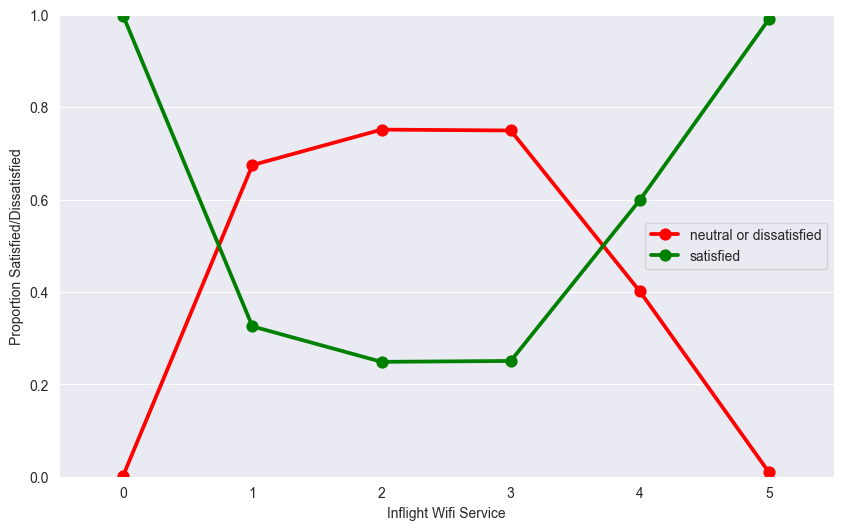

In [30]:
sns.pointplot(data=wifi_sat_pivot, 
              y=('proportion', 'neutral or dissatisfied'), 
              x='inflight_wifi_service', 
              label='neutral or dissatisfied', 
              color='red')

sns.pointplot(data=wifi_sat_pivot,
              y=('proportion', 'satisfied'), 
              x='inflight_wifi_service', 
              label='satisfied', 
              color='green')

plt.xlabel("Inflight Wifi Service")
plt.ylabel("Proportion Satisfied/Dissatisfied")
plt.ylim(0,1)
plt.legend()

> This countplot show the relationship between how satisfied flyers were with the inflight wifi and their overall satisfaction.
>
> Here, we see that flights that have a satisfaction of level 4 or 5, flyers tend to be more satisfied than not. On flights with wifi rated as 3 or less, they were very much more dissatisfied with the flight overall.
>
> We see on flights with a wifi service of 3 or less, less than 35% of the passengers were satsified with the overall experience. Meanwhile with a rating of 4 or more, over 50% were satisfied, with a rating of 5 having 99% satisfaction. 
>
> NOTE: A rating of 0 means the flight did not have wifi, and so was not a consideration. 

### Does departure delay have an affect on satisfaction?

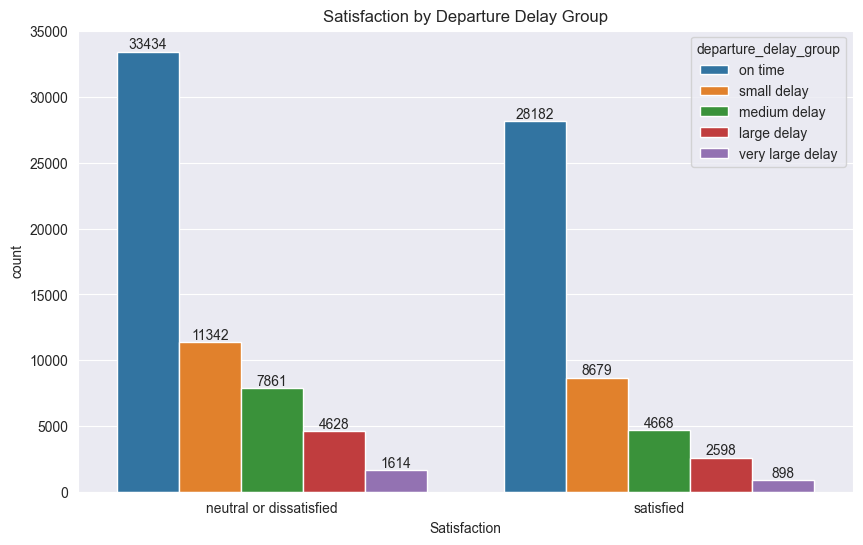

In [31]:
ax = sns.countplot(data=df, x='satisfaction', hue='departure_delay_group')
for container in ax.containers:
    ax.bar_label(container)

plt.title("Satisfaction by Departure Delay Group")
plt.xlabel("Satisfaction")
plt.savefig('./images/sat_depart.png')

> This countplot shows the number of satisfied (and dissatisfied) flyers for each delay group, defined below
> - on time: no delay
> - small delay: 1 - 15 minutes
> - medium delay: 16 - 45 minutes
> - large delay: 46 - 120 minutes (2 hours)
> - very large delay: 2 hours or more
>
> In each group between satisfied and dissatisfied flyers. We see that more flyers are dissatisfied, regardless of the departure delay

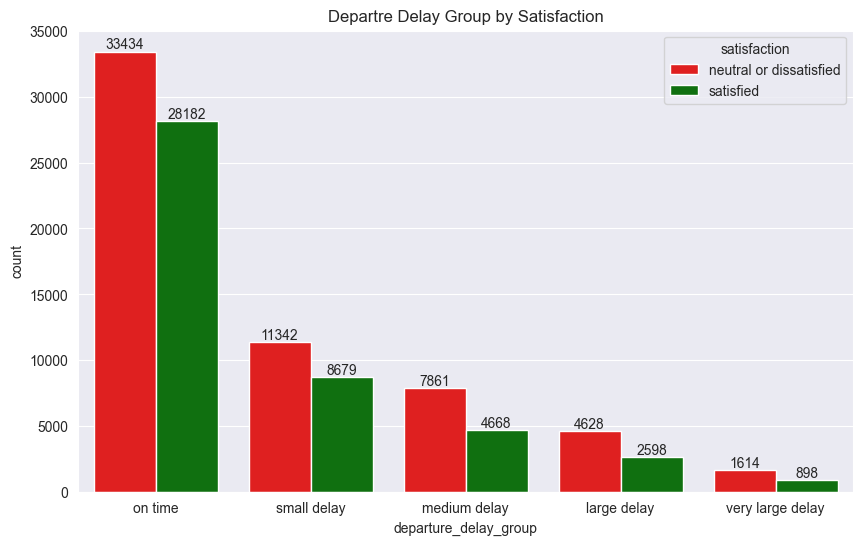

In [32]:
ax = sns.countplot(data=df, x='departure_delay_group', hue='satisfaction', palette=['red', 'green'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Departre Delay Group by Satisfaction")
plt.savefig('./images/depart_sat.png')

In [33]:
depart_sat = df.groupby('departure_delay_group', observed=False)['satisfaction'].value_counts(normalize=True).reset_index()
depart_sat_pivot = pd.pivot_table(depart_sat, columns='satisfaction', index='departure_delay_group', observed=False)
depart_sat_pivot

proportion          
satisfaction          neutral or dissatisfied satisfied
departure_delay_group                                  
on time                              0.542619  0.457381
small delay                          0.566505  0.433495
medium delay                         0.627424  0.372576
large delay                          0.640465  0.359535
very large delay                     0.642516  0.357484

In [34]:
depart_sat_pivot.columns

MultiIndex([('proportion', 'neutral or dissatisfied'),
            ('proportion',               'satisfied')],
           names=[None, 'satisfaction'])

In [35]:
depart_sat_pivot.loc[:, ('proportion', 'neutral or dissatisfied')]

departure_delay_group
on time             0.542619
small delay         0.566505
medium delay        0.627424
large delay         0.640465
very large delay    0.642516
Name: (proportion, neutral or dissatisfied), dtype: float64

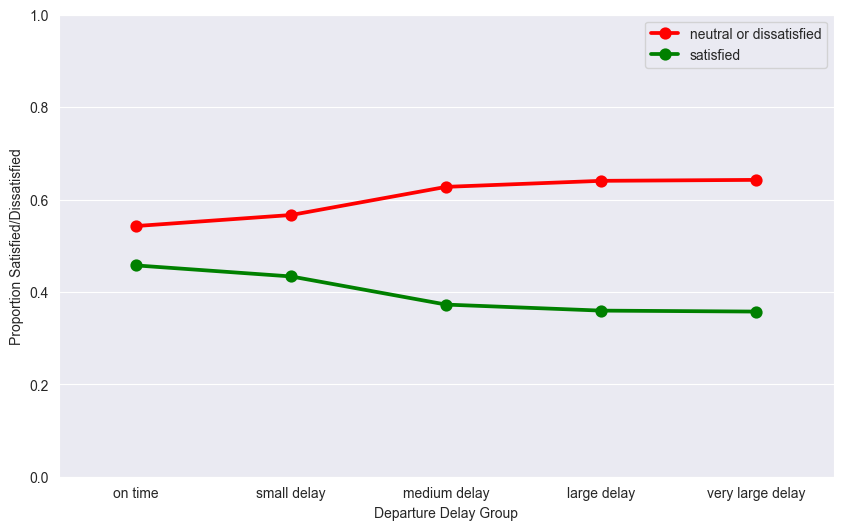

In [36]:
sns.pointplot(data=depart_sat_pivot, 
              y=('proportion', 'neutral or dissatisfied'), 
              x='departure_delay_group', 
              label='neutral or dissatisfied', 
              color='red')

sns.pointplot(data=depart_sat_pivot,
              y=('proportion', 'satisfied'), 
              x='departure_delay_group', 
              label='satisfied', 
              color='green')

plt.xlabel("Departure Delay Group")
plt.ylabel("Proportion Satisfied/Dissatisfied")
plt.ylim(0,1)
plt.legend()

> This countplot shows the groups reversed, and confirms that the departure delay does not seem to have much an effect on the overall satisfaction. More than half the on-time flights had a rating of dissatisfied, menaing other factors may of been at play. 

### How does airline satisfaction differ by gender?

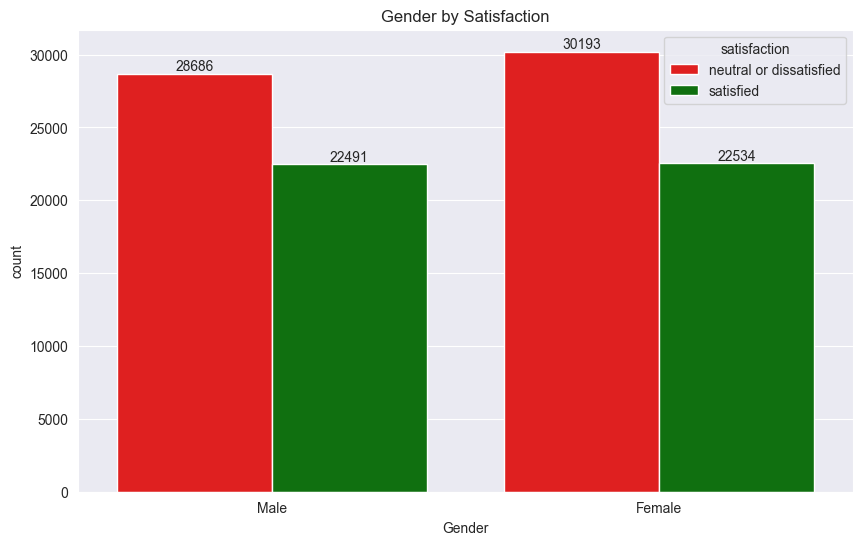

In [37]:
ax= sns.countplot(data=df, x='gender', hue='satisfaction', palette=['red', 'green'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gender by Satisfaction")
plt.xlabel("Gender")
plt.savefig('./images/gender_sat.png')

> In terms of satisfaction, both male and female have similar counts of being satisfied, but males tend to be a little less dissatisfied than females.
>
> 56% of males were dissatisfied, while 57% of females were dissatisfied.  

### How does the satisfaction rating differ by age group?

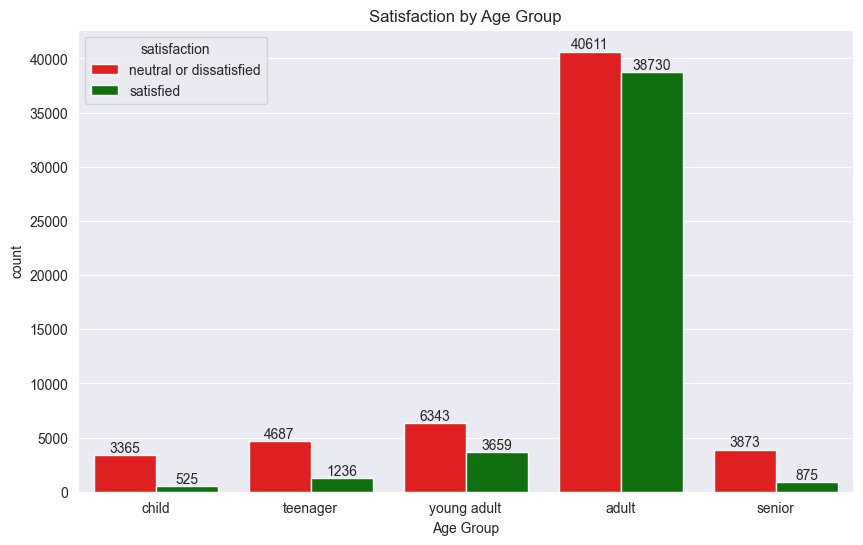

In [38]:
ax = sns.countplot(data=df, x='age_group', hue='satisfaction', palette=['red', 'green'])
for container in ax.containers:
    ax.bar_label(container)

plt.title("Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.savefig('./images/age_sat.png')

> One of the first things we see from this countplot is that adults are the most common age demographic. Regardless, in all the demographics, its more common to be dissatisfied than satisfied. However, the difference between teenages (see below) has the largest difference between satisfied and dissatisfied ratings. 

In [39]:
age_sat = df.groupby(['age_group', 'satisfaction']).size().unstack(fill_value=0) #.melt(id_vars='age_group', var_name='satisfaction')
age_sat

C:\Users\danie\AppData\Local\Temp\ipykernel_4216\2805701914.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sat = df.groupby(['age_group', 'satisfaction']).size().unstack(fill_value=0) #.melt(id_vars='age_group', var_name='satisfaction')


satisfaction,neutral or dissatisfied,satisfied
age_group,,
child,3365,525
teenager,4687,1236
young adult,6343,3659
adult,40611,38730
senior,3873,875


In [40]:
age_sat['diff'] = age_sat.loc[:, 'neutral or dissatisfied'] - age_sat.loc[:, 'satisfied']

In [41]:
age_sat.sort_values(by='diff', ascending=False)

satisfaction,neutral or dissatisfied,satisfied,diff
age_group,,,
teenager,4687,1236,3451
senior,3873,875,2998
child,3365,525,2840
young adult,6343,3659,2684
adult,40611,38730,1881


In [50]:
age_sat = df.groupby('age_group', observed=False)['satisfaction'].value_counts(normalize=True).reset_index()
age_sat_pivot = pd.pivot_table(age_sat, columns='satisfaction', index='age_group', observed=False)
age_sat_pivot

proportion          
satisfaction neutral or dissatisfied satisfied
age_group                                     
child                       0.865039  0.134961
teenager                    0.791322  0.208678
young adult                 0.634173  0.365827
adult                       0.511854  0.488146
senior                      0.815712  0.184288

In [52]:
age_sat_pivot.loc['child', 'proportion']

satisfaction
neutral or dissatisfied    0.865039
satisfied                  0.134961
Name: child, dtype: float64

([<matplotlib.patches.Wedge at 0x23481b06ad0>,
 [Text(-0.040954611637517443, 1.0992373355129548, 'neutral or dissatisfied'),
  Text(0.040955100853802585, -1.0992373172859695, 'satisfied')],
 [Text(-0.022338879075009515, 0.5995840011888843, '51.19%'),
  Text(0.022339145920255956, -0.5995839912468923, '48.81%')])

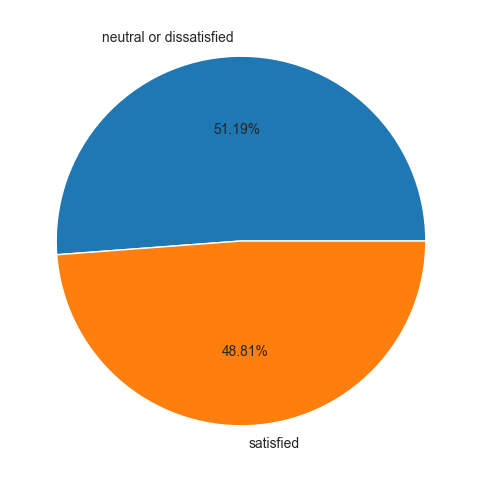

In [64]:
plt.pie(age_sat_pivot.loc['adult', 'proportion'], labels=['neutral or dissatisfied', 'satisfied'], autopct='%.2f%%')

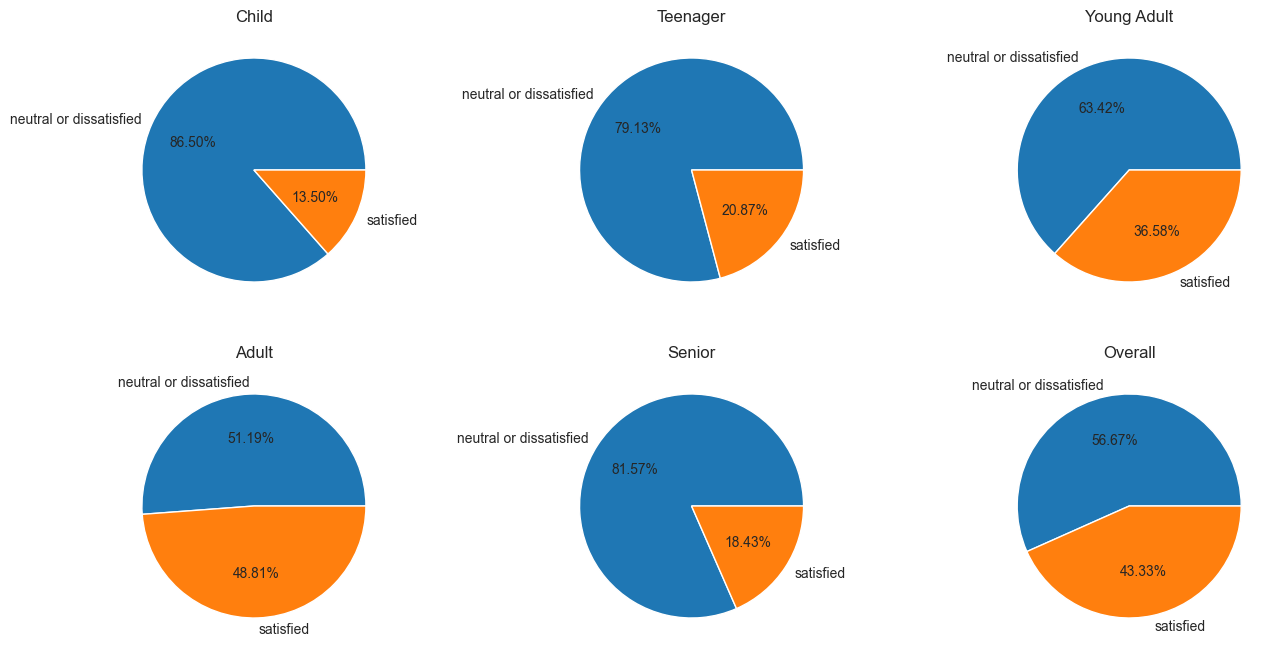

In [79]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))
positions = {
    'child': ax[0,0],
    'teenager': ax[0,1],
    'young adult': ax[0,2],
    'adult': ax[1, 0],
    'senior': ax[1, 1]
}
# fig.delaxes(ax[1, 2])
# ax[0, 2].pie(age_sat_pivot.loc['adult', 'proportion'], labels=['neutral or dissatisfied', 'satisfied'], autopct='%.2f%%')
# ax[0,2].set_title("Adult Proportion")

for index, plot in positions.items():
    plot.pie(age_sat_pivot.loc[index, 'proportion'], labels=['neutral or dissatisfied', 'satisfied'], autopct='%.2f%%')
    plot.set_title(index.title())

ax[1,2].pie(df['satisfaction'].value_counts(normalize=True), autopct='%.2f%%', labels=['neutral or dissatisfied', 'satisfied'])
ax[1,2].set_title("Overall")
plt.savefig("./images/age_group_pie.png")

### Does seat_comfort affect satisfaction?

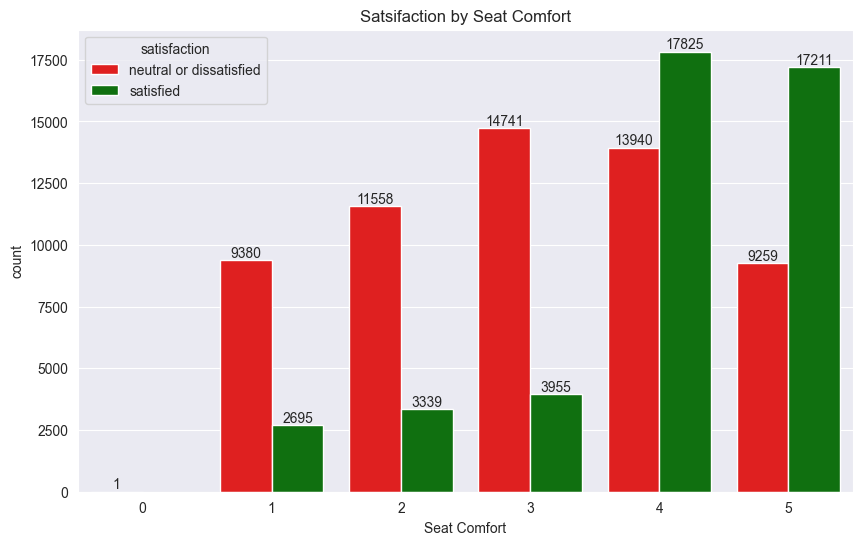

In [43]:
ax = sns.countplot(data=df, x='seat_comfort', hue='satisfaction', palette=['red', 'green'])
for container in ax.containers:
    ax.bar_label(container)

plt.title("Satsifaction by Seat Comfort")
plt.xlabel("Seat Comfort")
plt.savefig('./images/seat_sat.png')

> Similar to what we saw with the wifi, a seat comfort rating of 4 and 5 have more satisified ratings than 3 and below. In all the ratings, the difference is substantial. 

### Does cleanliness affect satisfaction?

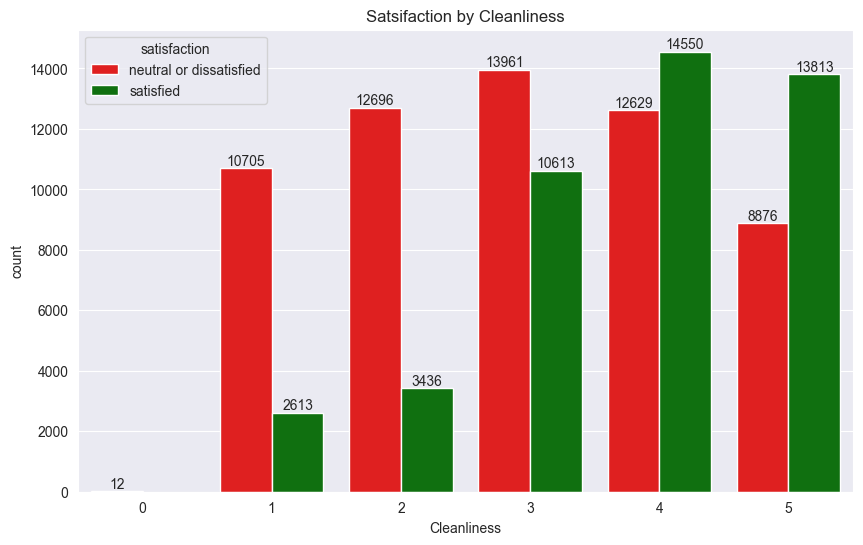

In [44]:
ax = sns.countplot(data=df, x='cleanliness', hue='satisfaction', palette=['red', 'green'])
for container in ax.containers:
    ax.bar_label(container)

plt.title("Satsifaction by Cleanliness")
plt.xlabel("Cleanliness")
plt.savefig('./images/clean_sat.png')

> Again, ratings that are 3 and under tend to be dissatisfied more often than satisfied. 4 and up for seat comfort tend to have more satsified customers. 

### Does online boarding affect satisfaction?

Text(0.5, 0, 'Online Boarding')

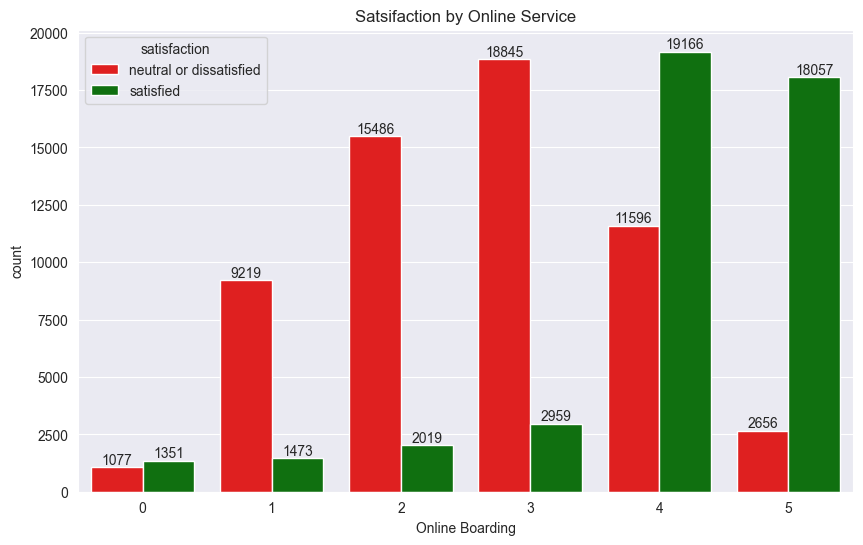

In [45]:
ax = sns.countplot(data=df, x='online_boarding', hue='satisfaction', palette=['red', 'green'])
for container in ax.containers:
    ax.bar_label(container)

plt.title("Satsifaction by Online Service")
plt.xlabel("Online Boarding")
# plt.savefig('./images/clean_sat.png')

> From this countplot, we see that the online boarding service satsifaction plays a big part in overall satisfaction.
>
> Oddly, with a satisfaction of 0, more passengers were satisfied than not (slightly). These might be passengers who did not do their boarding online, and got their boarding pass at the airport directly, so their satisfaction came from other areas. 

Text(0.5, 0, 'Check-In Service')

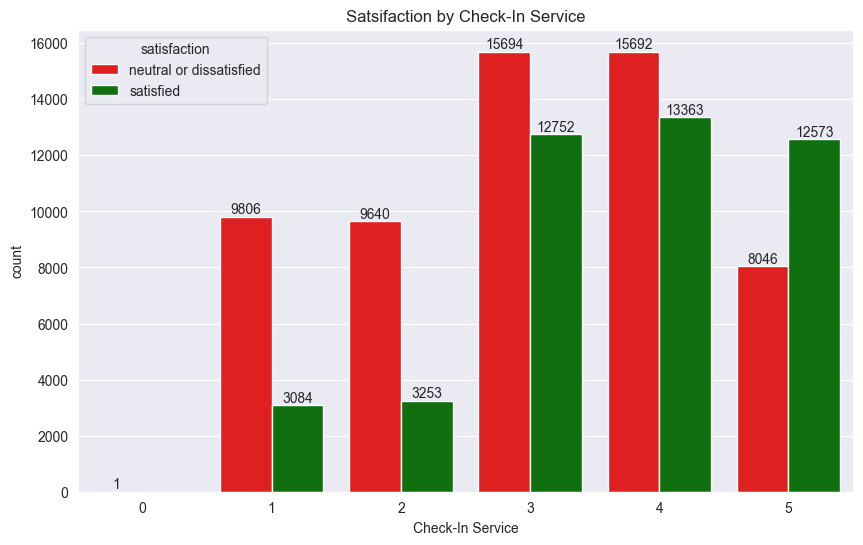

In [46]:
ax = sns.countplot(data=df, x='checkin_service', hue='satisfaction', palette=['red', 'green'])
for container in ax.containers:
    ax.bar_label(container)

plt.title("Satsifaction by Check-In Service")
plt.xlabel("Check-In Service")
# plt.savefig('./images/clean_sat.png')

> The check in service satisfaction most commonly is ranked as a 4, but the only ranking that results in more satisfied customers is a ranking of 5. 

In [47]:
df.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,arrival_delayed_missing,age_group,departure_delay_group,arrival_delay_group
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0,teenager,medium delay,medium delay
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0,adult,on time,small delay
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0,adult,on time,on time
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,adult,small delay,small delay
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,0,adult,on time,on time


In [48]:
df['satisfaction_codes'] = df['satisfaction'].cat.codes

In [49]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
sat_corrs = df.corr(numeric_only=True)[['satisfaction_codes']]

In [ ]:
sns.heatmap(sat_corrs,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)

In [ ]:
df.dtypes

In [ ]:
# df['age_group_codes'] = df['age_group'].cat.codes
# df['departure_delay_group_codes'] = df['departure_delay_group'].cat.codes
# df['arrival_delay_group_codes'] = df['arrival_delay_group'].cat.codes
df['class_codes'] = df['class'].cat.codes

In [ ]:
df = df.drop(columns=['age_group', 'departure_delay_group', 'arrival_delay_group', 'class', 'satisfaction_codes'])

In [ ]:
df.dtypes

In [ ]:
df.to_csv('./data/cleaned_airline.csv', index=0)